# Machine Learning and Risk Modelling

In this course, you will learn:
- The fundamental concepts of Machine Learning (ML) and its relationship with Artificial Intelligence (AI) and Deep Learning (DL)
- The application of ML in risk management particularly in the context of residual value risk in car leasing
- Based on a real-world use case, how to develop a ML risk model from scratch, including 
    - problem understanding
    - data preprocessing
    - feature selection
    - model training
    - model evaluation
- The importance of domain knowledge in developing accurate ML models
- Some commonly used ML techniques such as Bagging and Boosting
- The process of splitting data into training and test sets including sampling strategies such as cross-validation
- Ways to make your model accessible to users, i.e. the deployment of your ML model

## What is Machine Learning?

To grasp the definition of Machine Learning (ML), it's helpful to narrow the focus by exploring its relationship with Artificial Intelligence (AI) and Deep Learning (DL).


<img src="img/ai_ml_dl3.png" alt="AI, ML & DL" width="700" height="500"/>
<p>Image source: <a href="https://developer.nvidia.com/deep-learning">Nvidia</a></p>

<font color="#b0d45c"><b>Artificial Intelligence (AI)</b></font>:
- AI refers to machines performing tasks that typically require human intelligence.
- Originated in the 1940s with pioneers like Alan Turing and John von Neumann.
- Encompasses fields like machine learning, natural language processing, computer vision, robotics, and more.

<font color="#88bc04"><b>Machine Learning (ML)</b></font>:
- ML constructs predictive models from labeled data.
- Divided into supervised, unsupervised, and reinforcement learning.
    - Supervised: Model learns from labeled data.
    - Unsupervised: Model identifies patterns in unlabeled data.
    - Reinforcement: Model learns from rewards/penalties in an environment.
- In this course, we focus on supervised learning with tree-based regression methods.

<font color="#68ac04"><b>Deep Learning (DL)</b></font>:
- Subfield of ML focusing on neural networks.
- Utilizes multiple layers and specialized neurons.
- Ideal for large datasets and applications like images, texts, and signals.

**Machine Learning**
> Machine Learning is a subfield of Artificial Intelligence consisting of mathematical models that learn from historical data to solve narrow prediction/classification/decision tasks.

## Application of Machine Learning in Risk Management

Machine Learning (ML) has become an essential tool in **risk management** due to its ability to analyze vast amounts of data and uncover patterns that traditional methods may overlook. In today's complex financial landscape, organizations face numerous risks, and ML provides a robust framework for modeling and steering these risks effectively.




### Why Use Machine Learning?

1. **Enhanced Predictive Accuracy**: ML algorithms improve risk predictions by learning from historical data and adapting to new information, crucial for credit risk modeling.
1. **Real-Time Analysis**: ML processes data in real-time, enabling swift responses to emerging risks in dynamic markets.
1. **Complex Data Handling**: ML excels at processing vast amounts of complex financial data, allowing for comprehensive risk assessments (more on unstructured data in the [second part of the course](day2_nlp.ipynb)).
1. **Model Risk Management**: ML helps identify and mitigate model risk by providing insights into model performance and reliability.
1. **Automation and Efficiency**: ML automates routine risk assessment tasks, freeing up resources for strategic decision-making, especially in credit risk management.

In summary, integrating ML into risk management enhances predictive capabilities and streamlines processes, making it invaluable for navigating modern financial risks.

### A real-world use case: Residual Value Risk Modelling

In the following, we will work on a real-world use case that car leasing entities typically face. It is the risk associated with the uncertainty of what a leased out car can be resold at when the car returns to the leasing entity. This asset risk is commonly known as residual value risk.

**Residual Value**
> Residual value is the estimated value of a vehicle at the end of its lease term. This value can be predicted via a ML model that is trained on historical remarketing data.

<img src="img/rv.png" alt="Car depreciation" width="1000" height="500"/>
<p>Image source: <a href="https://diminishedvalueofgeorgia.com/the-top-10-slowest-depreciating-used-cars-in-the-u-s/">Diminished Value of Georgia</a></p>

**Why do leasing companies care about residual values?**

Residual values are crucial for determining the expected worth of an asset at the end of its lease term. Accurate estimates help leasing companies set appropriate lease payments and manage financial risk. If the actual residual value is lower than expected, it can lead to financial losses.

A key objective in residual value risk management is to accurately predict residual values to enable optimal lease pricing and prevent future losses when remarketing used vehicles.

**What determines the residual value of a vehicle?**

Besides the actual condition of the used car, proxied by factors such as age, mileage or damage information, changing customer preferences, economic swings, greater transparency in the used-car market, new technologies such as electric cars, or the regulatory uncertainties do all affect the residual value of a car. This makes the prediction of used cars a complicated task.

## Developing a Machine Learning Model

When building a ML model from scratch, we typically follow these key steps:

1. **Understand the Problem**: Define the problem clearly. Identify if it's a classification, regression, or clustering task to guide algorithm and metric choices.

2. **Data Collection & Preprocessing**: Gather relevant data, clean it, handle missing values, and transform features for modeling.

3. **Feature Selection & Engineering**: Identify and create relevant features to enhance model performance.

4. **Choose the Algorithm**: Select an appropriate algorithm based on data and problem nature.

5. **Model Training & Validation**: Train the model with a portion of the data and validate with another to assess generalization.

6. **Model Evaluation**: Use metrics like accuracy, precision, recall, or F1 score to evaluate performance.

7. **Calibration & Tuning**: Fine-tune parameters using cross-validation and hyperparameter tuning.

8. **Deployment & Monitoring**: Deploy the model and continuously monitor its performance to adapt to data changes.hen building a ML model from scratch, there are some fundamental steps one typically follows to come up with a production ready model:

### Understanding the Problem

Developing a residual value model is a regression task because it involves predicting a continuous numerical value, specifically the future resale price of a vehicle at the end of its lease term. Regression tasks are used when the target variable is a continuous quantity, as opposed to classification tasks where the target variable is categorical. In this case, the model aims to estimate the residual value based on various features such as vehicle characteristics and macroeconomic indicators. In general, domain knowledge is as vital as technical skills in developing effective ML models. Collaborate with domain experts to enhance your solutions, especially when working in unfamiliar fields.

### Data Preprocessing

#### Data Cleaning

First, we import `pandas` a popular Python library that is designed to wrangle rectangular data.

In [31]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

Then we read the data on US used cars.

In [32]:
df_uc = pd.read_csv('data/used_car.csv', parse_dates=['posting_date'])

How many observations (samples) and variables (features) do we have?

In [33]:
df_uc.shape

(426812, 17)

Overall, there 17 features with 426,812 samples.

Next, we have a first glimpse at the data and check the data types.

In [34]:
df_uc.sample(3)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,VIN,drive,type,paint_color,state,posting_date
214763,7316277039,minneapolis / st paul,25999,2014.00,gmc,yukon,NaN,NaN,gas,109796.00,automatic,1GKS2EEF7ER101685,NaN,NaN,white,mn,2021-05-03
214888,7316205704,minneapolis / st paul,27990,2012.00,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.00,other,1GT220CG8CZ231238,4wd,pickup,black,mn,2021-05-03
356739,7301737443,knoxville,39990,2020.00,lincoln,corsair reserve sport,good,NaN,gas,7469.00,other,5LMCJ2C97LUL00172,fwd,other,blue,tn,2021-04-04


A short description of each variable can be found [here](data/used_car_dictionary.md).

In [35]:
df_uc.dtypes

id                       int64
region                  object
price                    int64
year                   float64
manufacturer            object
model                   object
condition               object
cylinders               object
fuel                    object
odometer               float64
transmission            object
VIN                     object
drive                   object
type                    object
paint_color             object
state                   object
posting_date    datetime64[ns]
dtype: object

Note the following definition of data types:
- `int64`: integer type.
- `float64`: floating point type.
- `object`: generic container for any Python object (here used for string variables)

The automatic data type conversion makes sense.

We want to ensure that there are no duplicate entries in our data. ML models may give undue weight to duplicate entries, effectively treating them as more important than unique samples. This can skew the learning process, especially if the duplicates belong to a specific class, leading to a biased model that does not accurately reflect the underlying distribution of the data.

In [36]:
df_uc.drop(columns=['id']).duplicated().sum().__str__()

'4222'

There are 4222 duplicates in our raw data. We keep only the first entry.

In [37]:
df_uc = df_uc.drop(columns=['id']).drop_duplicates(keep='first')

A common way to get a first feeling for the variables is to look at their descriptive statistics. This can be done with the pandas method `describe()`.

In [38]:
df_uc.describe(exclude=['object']) # integers, floats and datetime

,price,year,odometer,posting_date
count,422590.00,421475.00,418324.00,422590
mean,75774.14,2011.23,97993.36,2021-04-23 08:18:04.557609216
min,0.00,1900.00,0.00,2021-04-04 00:00:00
25%,5950.00,2008.00,37531.00,2021-04-17 00:00:00
50%,13988.00,2013.00,85377.00,2021-04-25 00:00:00
75%,26500.00,2017.00,133600.00,2021-05-01 00:00:00
max,3736928711.00,2022.00,10000000.00,2021-05-05 00:00:00
std,12243930.69,9.47,213704.62,NaN


We can see that there outliers in the data:
- maximum `price` of 3,736,928,711 $ is not a reasonable price for a used car
- maximum `odometer` of 10,000,000 seems also off
- model `year` of 1900 seems to be a data quality issue as well

In the following we remove these outliers. 

In [39]:
# 1: Remove samples with a price >= 100000
df_uc = df_uc.loc[df_uc['price']<100000]

# 2: Remove samples with a year < 2000
df_uc = df_uc.loc[df_uc['year']>=2000]

# 3: Remove samples with a odometer > 200000
df_uc = df_uc.loc[df_uc['odometer']<=200000]

In [40]:
df_uc.describe(include=['object']) # strings only

,region,manufacturer,model,condition,cylinders,fuel,transmission,VIN,drive,type,paint_color,state
count,372280,361468,369065,218465,214072,370244,370764,247417,259796,297770,261213,372280
unique,404,41,23395,6,8,5,3,108744,3,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,automatic,1FMJU1JT1HEA52352,4wd,sedan,white,ca
freq,3194,60453,7019,106911,83390,310918,293591,261,117001,80398,69925,43164


Alternatively, we can also visualize the univariate distribution of each of the variables. For this purpose, I provide a convenience function `plot_univariate()` which you can find in the [util.py](util.py) module.

In [41]:
from util import plot_univariate

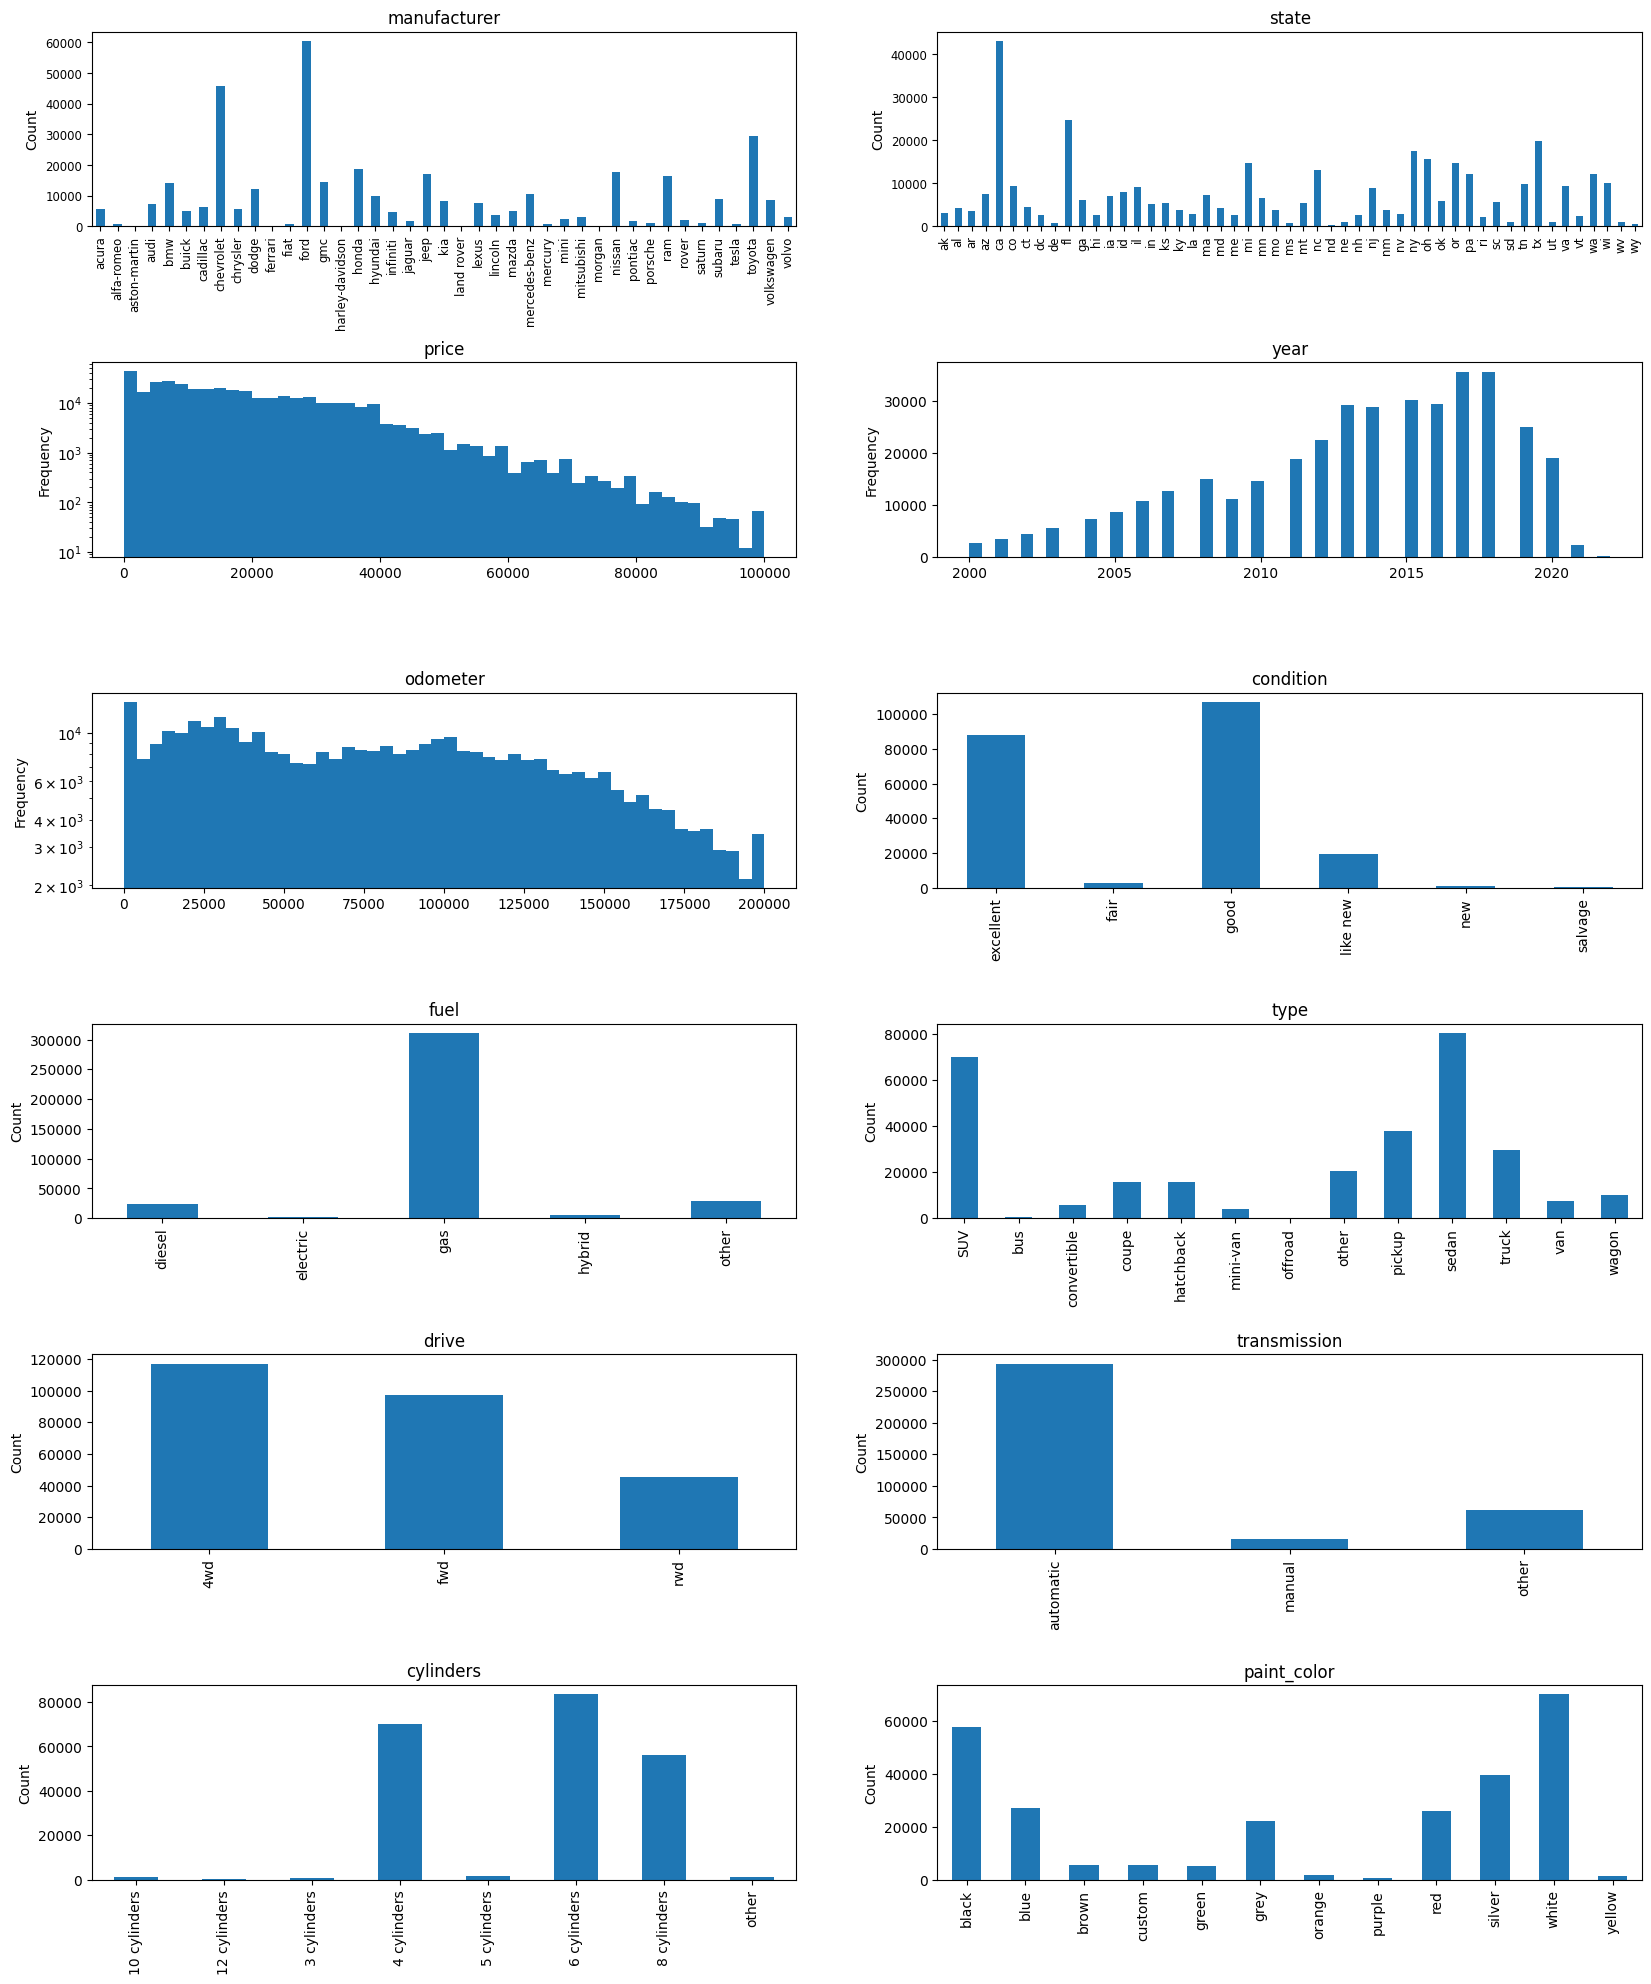

In [42]:
plot_univariate(
    df_uc, 
    columns=['manufacturer', 'state', 'price', 'year', 'odometer', 'condition', 'fuel', 'type', 'drive', 'transmission', 'cylinders', 'paint_color'], 
    log_dict={'price': True, 'odometer': True})

From the plot above we can see that the data contains used car prices from various manufacturers. The used cars have been offered in different states in the US and span across different model years. There is great variance across odometer which is one of the most important variables to reflect the residual value of a used car. In terms of price, there is a relatively high concentration of cars that have been offered at a price close to 0. Moving forward we drop samples with a price below 1,000 $ as these samples are not of interest in a residual value context.

In [43]:
df_uc = df_uc.loc[df_uc['price'] > 1000]

In the context of residual value risk management we aim at answering the following questions:
- Can we train a model that reliably predicts the residual value, i.e. the used-car price, given information about the vehicle (that is available at *inception* of the lease contract)?
- To what extent do residual values depend on macroeconomic conditions?

Translating these questions into a ML problem can be stated as follows:
- We want to predict vehicles' used car prices which is the **target variable**, $y$ ...
- ... based on information about the vehicle and the macroeconomic features at time of remarketing which we call **features**, $\bold{X}$ ...
- ... whereas the resulting model needs to fulfill a certain minimum level of prediction quality as measured by a scoring function on the prediction error, $s\left(\epsilon
\right)$.
- Does a proxy for the macroeconomic condition such as GDP growth have a high feature importance, i.e. does it help in predicting the used car value?

In [44]:
df_uc.reset_index(drop=True, inplace=True)

In [45]:
# Target variable
y = df_uc['price']

In [46]:
# Features
X = df_uc.drop(columns=['price'])

#### Train-Test Split

In machine learning projects, splitting the dataset into **training** and **test** sets is essential.

**Why Split the Data?**

1. **Model Evaluation**: Train the model on the training set and evaluate its performance on the test set to ensure it generalizes well to new data.
2. **Prevent Overfitting**: Monitor and mitigate overfitting by keeping a separate test set. Overfitting occurs when a model performs well on training data but poorly on new data. In section [Model Fine Tuning](#model-fine-tuning), we will learn about cross-validation to further prevent overfitting.

**When to Split the Data?**

- **Early in the Pipeline**: Splitting early ensures data integrity and prevents data leakage, maintaining an unbiased estimate of the model's performance.

We split the data at random into training and test sets using the `train_test_split()` method from the popular `scikit-learn` library that provides a wide range of ML algorithms and other convenience functions that are typically used in ML pipelines. We will keep 20% of the data aside in the test set. For reproducibility we set a seed via the `random_state` argument.

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=333)

#### Handling Missing Values

Most ML models cannot handle missing values. Therefore, we replace missing values with reasonable substitutes, a process called data imputation. This approach is preferred over dropping samples with missing values, as it preserves the model's ability to learn patterns from the training data. Fewer observations mean fewer patterns to learn.

In [49]:
X_train.isnull().sum()

region               0
year                 0
manufacturer      7169
model             2011
condition       101347
cylinders       111302
fuel              1601
odometer             0
transmission      1087
VIN              90247
drive            79740
type             51882
paint_color      73975
state                0
posting_date         0
dtype: int64

Most of the features have missing values. There are different imputation strategies and, depending on the feature, one or the other makes more sense.

##### year

For the model year domain knowledge helps us to define a good imputation approach. In fact, the 10th character of the vehicle identification
number (VIN) gives precise information on the vehicles model year. The VIN serves as unique identifier of the vehicle and is available in our data set.

<img src="img/vin.jpg" alt="VIN" width="750" height="500"/>
<p>Image source: <a href="https://www.autocheck.com/vehiclehistory/vin-basics">AutoCheck</a></p>

We import a dictionary that maps the 10th digit of the VIN to the model year. I have prepared this mapping dictionary in the [util.py](util.py) module.

In [50]:
from util import vin_to_year

In [51]:
X_train.loc[X_train.year.isnull(), 'year'] = X_train.loc[X_train.year.isnull()].VIN.apply(lambda x: x[9]).map(vin_to_year)

##### manufacturer

The same applies to the manufacturer. 2nd and 3rd character of the VIN give information about the car manufacturer. Again, we use this information to impute the manufacturer column.

In [52]:
from util import vin_to_manufacturer

In [53]:
X_train.loc[X_train.manufacturer.isnull() & X_train.VIN.notnull(), 'manufacturer'] = X_train.loc[X_train.manufacturer.isnull() & X_train.VIN.notnull()].VIN.apply(lambda x: x[0:3]).map(vin_to_manufacturer)

##### model

A valid imputation strategy for categorical variables is to introduce a new category "unknown" as imputation of missing values. We follow this strategy for the model column using the `SimpleImputer` class of `scikit-learn`.

In [54]:
from sklearn.impute import SimpleImputer

In [55]:
X_train[['model']] = SimpleImputer(strategy='constant', fill_value='unknown').fit_transform(X_train[['model']])

##### paint_color

We can use the `SimpleImputer` also to impute missing values with the most frequent value. We do so for the paint_color variable.

In [56]:
X_train[['paint_color']] = SimpleImputer(strategy='most_frequent').fit_transform(X_train[['paint_color']])

##### cylinders, fuel, transmission, drive, type

We impute missing values in cylinders, fuel, transmission, drive, type whith the most frequent value conditioned on the manufacturer and the vehicle's body type.

In [57]:
from util import ConditionalImputer
from tqdm import tqdm

In [58]:
columns_to_impute = ['cylinders', 'fuel', 'transmission', 'drive']

In [59]:
for column in tqdm(columns_to_impute):
    # Create a list of condition columns excluding the current target column
    relevant_cols = ['manufacturer', 'type'] + [column]
    
    # Impute the target column using the adjusted condition columns
    X_train[column] = ConditionalImputer(target_col=column, condition_cols=['manufacturer', 'type'], strategy='most_frequent').fit_transform(X_train[relevant_cols])

  0%|          | 0/4 [00:00<?, ?it/s]w:\teaching\risk_analytics\util.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[self.target_col] = imputed_column
  0%|          | 0/4 [00:17<?, ?it/s]


ValueError: Columns must be same length as key

In [ ]:
columns_to_impute = ['cylinders', 'fuel', 'transmission', 'drive', 'type']

In [ ]:
for column in tqdm(columns_to_impute):
    # Create a list of condition columns excluding the current target column
    relevant_cols = ['manufacturer'] + [column]
    
    # Impute the target column using the adjusted condition columns
    X_train[column] = ConditionalImputer(target_col=column, condition_cols=['manufacturer'], strategy='most_frequent').fit_transform(X_train[relevant_cols])

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:08<00:00,  1.61s/it]


##### odometer

One intuitive imputation strategy for the odometer (miles driven) is to assume that the older the car, the more miles have been driven on average. For this purpose we first calculate the age of the vehicle which is the time between model year and posting date.

In [ ]:
X_train['age'] = X_train['posting_date'].dt.year - X_train['year']

We now impute the missing odometer with the most similar used cars in terms of vehicle age. For this purpose, we use `scikit-learn`'s `KNNImputer` class.

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
X_train[['age', 'odometer']] = KNNImputer(n_neighbors=10).fit_transform(X_train[['age', 'odometer']])

The remaining observations with missing values are going to be dropped.

In [ ]:
X_train = X_train.loc[X_train.drop(columns=['VIN', 'condition']).notnull().all(axis=1)]
y_train = y_train.loc[X_train.index]

In [ ]:
X_train.isnull().sum()

region              0
year                0
manufacturer        0
model               0
condition       99550
cylinders           0
fuel                0
odometer            0
transmission        0
VIN             86985
drive               0
type                0
paint_color         0
state               0
posting_date        0
age                 0
dtype: int64

In [ ]:
X_train.shape

(259935, 16)

We now have a clean training data set with 291,384 complete samples.

### Feature Engineering

#### Feature Selection

When selecting features for training a machine learning model, it's crucial to consider if the information will be available at the time of inference, i.e. when we use the model to make a prediction.
In risk management, we apply the model at the *start* of a lease to determine the lease rate based on residual value prediction. Thus, any information available only at the end of the lease cannot be used.

Key considerations:
- The exact state or region where the car will be sold is unknown at the lease's start. However, if the company plans its off-lease strategy in advance, this information might be known. We disregard these variables going forward.
- Age and odometer readings are not precisely known but can be reasonably estimated based on the lease period and maximum annual mileage as per lease contract.
- The final condition of the vehicle at the end of the lease is unknown.

Therefore, we drop 'condition', 'region' and 'state' from our feature set. Additionally, we drop the VIN as it has little predictive value for the residual value of a car.

In [ ]:
X_train = X_train.drop(columns=['condition', 'region', 'state', 'VIN'])

NameError: name 'X_train' is not defined

Further feature engineering typically involves creating new features from the data that can improve the model's predictive power. For example, above we have already created a new feature `age` from information of the manufacturing year and the date when the used car was posted on the sales platform.

In [ ]:
X_train = X_train.drop(columns=['year', 'posting_date'])

Often special special equipment such as sport packages depreciate faster than the bare vehicles. We can use the model variable to retrieve information whether the vehicle is a "sports version"

In [ ]:
X_train['sport'] = X_train['model'].apply(lambda x: 'sport' in x.lower()).astype(int)

In [70]:
X_train = X_train.drop(columns=['model'])

One could consider additional feature engineering steps. For instance, the VIN count could serve as a proxy for the number of previous owners. However, this is beyond the scope of this course.

#### Encoding Categorical Variables

Encoding categorical variables is important before training a machine learning model because most ML algorithms require numerical input and cannot directly handle categorical data. Encoding can be done using techniques such as one-hot encoding, where each category is converted into a binary vector. We do so by using the `OneHotEncoder` class from scikit-learn. 

In [71]:
from sklearn.preprocessing import OneHotEncoder

In [72]:
# Step 1: Fit and transform the data
encoder = OneHotEncoder(
    sparse_output=False, 
    min_frequency=5, 
    handle_unknown='infrequent_if_exist').fit(X_train[['manufacturer', 'state', 'fuel', 'cylinders', 'paint_color', 'type', 'drive', 'transmission']])

# Transform the data
encoded_data = encoder.transform(X_train[['manufacturer', 'state', 'fuel', 'cylinders', 'paint_color', 'type', 'drive', 'transmission']])

# Step 2: Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# Step 3: Concatenate the original DataFrame with the encoded DataFrame
X_train = pd.concat([X_train.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Step 4: Drop the original categorical columns if no longer needed
X_train.drop(columns=['manufacturer', 'state', 'fuel', 'cylinders', 'paint_color', 'type', 'drive', 'transmission'], inplace=True)

In [73]:
X_train.head(3)

,odometer,age,sport,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,type_sedan,type_truck,type_van,type_wagon,drive_4wd,drive_fwd,drive_rwd,transmission_automatic,transmission_manual,transmission_other
0,86000.00,8.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
1,52159.00,2.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
2,107862.00,6.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00


### Model Training

A crucial step in the development of a ML model is that different algorithms have varying strengths and weaknesses, and selecting the most suitable one can significantly impact the model's performance and accuracy.

The number of algorithms for supervised learning tasks for regression is relatively wide spread. A good overview can be found [here](https://scikit-learn.org/stable/supervised_learning.html).

In this course we focus on tree-based models. The basic building block, also known as base learner, in a tree-based model is a Decision Tree.

#### Decision Tree

The decision logic of a decision tree involves the following steps:

- Splitting: The data is split into subsets based on the value of a feature. The goal is to find the feature and split point that best separate the data according to the target variable.
- Decision Rules: Each node in the tree represents a decision rule based on a feature. For example, "Is feature X greater than value Z?".
- Leaf Nodes: The terminal nodes (leaves) of the tree represent the prediction of the model. In regression, this is typically the mean value of the target variable of all samples that fall into the respective leaf.

**Decision Tree**:
> Decision Trees split the data into subsets based on the value of input features, creating a tree where each node represents a feature and each branch represents a decision rule.

In the following, we train a simple decision tree using `DecisionTreeRegressor` from scikit-learn. With the the arguments `max_depth` and `min_samples_split` we control the complexity of the final tree:
- `max_depth`: The maximum number of subsequent binary splits, i.e. how large the tree is allowed to get
- `min_samples_split`: The minimum number of samples that need to be in a terminal leaf

In [74]:
from sklearn import tree

In [75]:
model = tree.DecisionTreeRegressor(max_depth=2, min_samples_leaf=1000).fit(X_train, y_train)

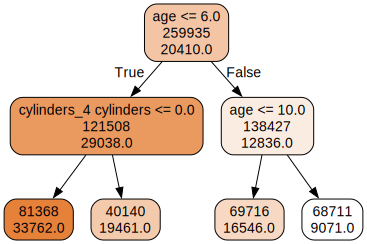

In [76]:
import graphviz
# Export the tree structure without squared error information
dot_data = tree.export_graphviz(
    model, 
    out_file=None, 
    feature_names=X_train.columns,    
    filled=True, 
    rounded=True,  
    special_characters=False,
    node_ids=False,  # Disable node IDs
    proportion=False,  # Disable proportions
    impurity=False,  # Disable impurity (which includes squared error)
    leaves_parallel=True,
    precision=0,
    label='none'
)

# Create a graph from the dot data
graph = graphviz.Source(dot_data)  
graph

From the visualization above, we can observe that the 259,935 training observations are initially divided based on the **age** of the vehicle. Used cars that are **6 years old or newer** move to the left in the decision tree, while those that are **older than 6 years** move to the right. Among the cars that are 6 years old or newer, those with **4-cylinder engines** have an average price of **$19,461**, whereas cars with other engine types average **$33,762**. For the cars older than 6 years, those that are **over 10 years old** have an average price of **$9,071**, while cars that are **between 6 and 10 years old** average **$16,546**.

This simple decision tree effectively partitions the data based on the features of the observations, resulting in distinct average prices in the terminal leaves, which highlights the impact of vehicle age and engine type on pricing. However, decision trees are often considered **weak learners** because they can easily **overfit** the training data, especially when they are deep (high complexity), leading to models that may not generalize well to unseen data. Similarly, a decision tree with low depth (low complexity) as in the example above, also called a **stump**, is also a weak learner because it captures very limited information about the data, making it prone to high bias and low accuracy in predictions.

**Overfitting**
> Overfitting occurs when a machine learning model learns the training data too well, capturing noise and details that do not generalize to new, unseen data. This results in a model that performs well on training data but poorly on test data.
>
>Overfitting is related to the concepts of variance and bias:
>
>- High Variance: Overfitting models have high variance, meaning they are too sensitive to the fluctuations in the training data.
>
>- Low Bias: Overfitting models typically have low bias, meaning they fit the training data very closely.

<img src="img/biasvariance.png" alt="Bias Variance Trade-off" width="750" height="500"/>
<p>Image source: <a href="https://scott.fortmann-roe.com/docs/BiasVariance.html">Scott Fortmann Roe</a></p>

In [77]:
from util import plot_predictions 

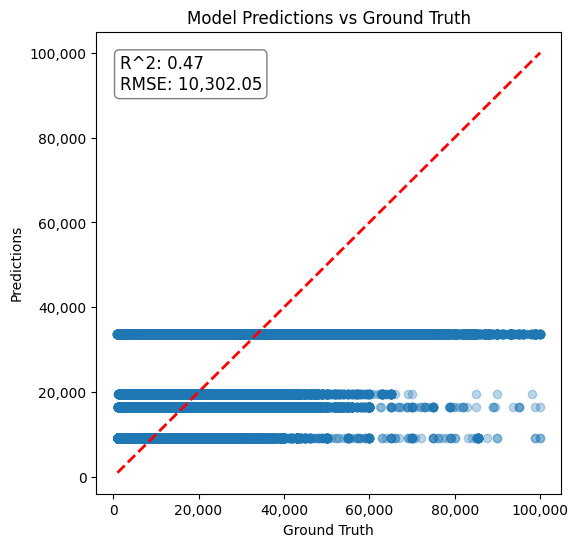

In [78]:
y_pred = model.predict(X_train)
plot_predictions(y_train, y_pred)

#### Random Forest

A **Random Forest** is an ensemble learning method used for classification and regression tasks. It operates by constructing multiple decision trees during training and outputting the mode of the classes (classification) or mean prediction (regression) of the individual trees. The key characteristics of a Random Forest are:

- **Ensemble of Trees**: It builds a large number of decision trees (hence "forest") and merges their results to improve accuracy and control overfitting.
- **Bootstrap Aggregation (Bagging)**: Each tree is trained on a random subset of the training data, sampled with replacement (bootstrapping). This helps in reducing variance.
- **Random Feature Selection**: At each split in the tree, a random subset of features is considered for splitting, which helps in reducing correlation among the trees and improves model robustness.

Random Forests are known for their high accuracy, ability to handle large datasets with higher dimensionality, and robustness to overfitting.

**Random Forest**
> A random forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees.

We train a Random Forest using `RandomForestRegressor` from scikit-learn. We control the training process by means of the following argument:
- `n_estimators`: The number of decision trees
- `max_depth`: The maximum depth of a tree
- `bootstrap`: Whether a random fraction of the samples should be used when training a tree, i.e. bootstrap sampling
- `max_features`: The number of features to consider when looking for the best split in a tree (sqrt(number_features))
- `random_state`: Since `bootstrap` and `max_features` add randomness to the training process, `random_state` sets a seed for reproducibility

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
model = RandomForestRegressor(
    n_estimators=100, 
    max_depth=20, 
    bootstrap=True,
    max_features='sqrt',
    random_state=333).fit(X_train, y_train)

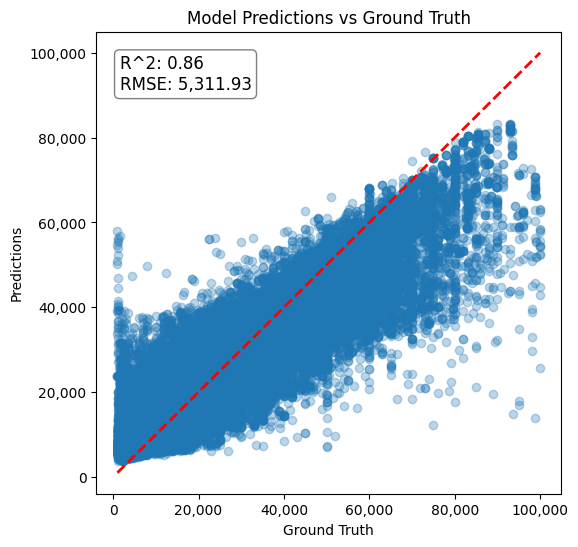

In [81]:
y_pred = model.predict(X_train)
plot_predictions(y_train, y_pred)

#### Gradient Boosting

**Gradient Boosting** is a powerful machine learning technique used for regression and classification tasks. Similar to a Random Forest, it builds an ensemble of decision trees. The difference is that in Boosting the ensemble is built in a sequential manner, where each tree attempts to correct the errors of the previous ones. Here's a high-level overview of how it works:

- **Sequential Learning**: Add decision trees one at a time. Each new tree is trained to predict the residual errors (the difference between the actual values and the predictions of the current model) of the combined ensemble of previous trees.
- **Gradient Descent**: The model uses gradient descent to minimize the loss function. The gradients of the loss function with respect to the model's predictions are used to fit the new tree.
- **Update Model**: The predictions of the new tree are added to the ensemble with a certain weight (learning rate), which controls the contribution of each tree.

**Gradient Boosting**
> Gradient Boosting is a machine learning technique that builds an ensemble of decision trees sequentially, where each tree attempts to correct the errors of the previous ones by minimizing a loss function using gradient descent.

In [82]:
from sklearn.ensemble import GradientBoostingRegressor 

In [83]:
model = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.1,
    max_features='sqrt',
    random_state=333).fit(X_train, y_train)

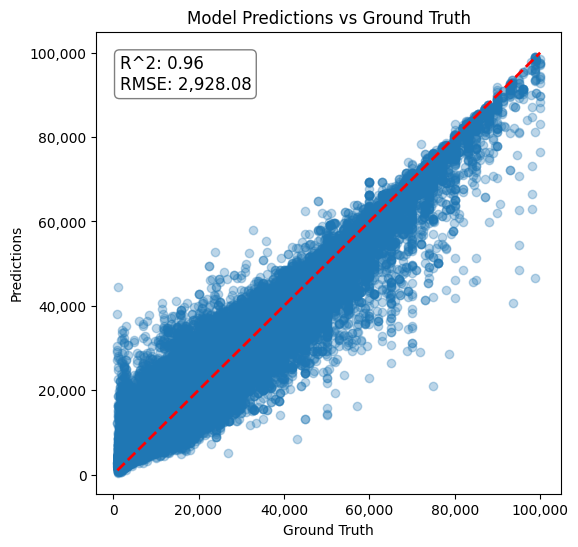

In [84]:
y_pred = model.predict(X_train)
plot_predictions(y_train, y_pred)

### Model Fine Tuning

So far, we have arbitrarily set the arguments of the ML models above. We neglected whether the values that we have chosen are optimal in the sense that they yield a model that solves the underlying task of predicting residual values of vehicles with the lowest possible error. In ML terms, these arguments are called **hyperparameters**.

Here are some key points about hyperparameters:

- Predefined: Hyperparameters are set manually before training the model.
- Model Control: They control aspects of the training process, such as the learning rate or the complexity of the model.
- Tuning: Hyperparameter tuning is the process of finding the optimal values for these parameters to improve model performance.

**Hyperparameter**
> A hyperparameter in a machine learning model is a parameter whose value is set before the learning process begins. Unlike model parameters, which are learned from the training data, hyperparameters are used to control the learning process and influence the performance of the model.

| Parameter Type | Decision Tree | Random Forest | Gradient Boosting |
|----------------|---------------|---------------|-------------------|
| **Hyperparameters** | | | |
| `max_depth` | Maximum depth of the tree | Maximum depth of each tree | Maximum depth of each tree |
| `min_samples_split` | Minimum number of samples required to split an internal node | Minimum number of samples required to split an internal node | Minimum number of samples required to split an internal node |
| `min_samples_leaf` | Minimum number of samples required to be at a leaf node | Minimum number of samples required to be at a leaf node | Minimum number of samples required to be at a leaf node |
| `max_features` | Number of features to consider when looking for the best split | Number of features to consider when looking for the best split | Number of features to consider when looking for the best split |
| `criterion` | Function to measure the quality of a split (e.g., `mse`, `mae`) | Function to measure the quality of a split (e.g., `mse`, `mae`) | Loss function to be optimized (e.g., `mse`, `mae`) |
| `splitter` | Strategy used to choose the split at each node (e.g., `best`, `random`) | N/A | N/A |
| `n_estimators` | N/A | Number of trees in the forest | Number of boosting stages to be run |
| `bootstrap` | N/A | Whether bootstrap samples are used when building trees | N/A |
| `learning_rate` | N/A | N/A | Shrinks the contribution of each tree by `learning_rate` |
| **Model Parameters** | | | |
| splitting features | At each node in the tree the feature (along with its optimal splitting point) that minimizes the prediction error is learnt | In each tree, at each node the feature (along with its optimal splitting point) that minimizes the prediction error is learnt | In each tree, at each node the feature (along with its optimal splitting point) that minimizes the prediction error is learnt|
| splitting points | Optimal splitting point of each splitting feature | Optimal splitting point of each splitting feature | Optimal splitting point of each splitting feature |
| gradient updates | N/A | N/A | The gradients of the loss function with respect to the predictions are computed at each iteration. These gradients guide the adjustments made to the predictions and are learned during the training process |
| weights | N/A | N/A | The final prediction is a weighted sum of the predictions from each tree, where the weights are determined by the learning process
| leaf node values | Each leaf node is assigned the mean value of the target values of the training samples that reach that leaf which forms the model'S prediction | In each tree, each leaf node is assigned the mean value of the target values of the training samples that reach that leaf with the mean value across all trees forming the model's prediction | In each tree, each leaf node is assigned the mean value of the target values of the training samples that reach that leaf with the weighted sum across all trees forming the model's prediction |

When fine tuning a ML model there are two important aspects we need to consider:
1. We do not want to find the optimal set of hyperparameters that explains the training data best but the optimal set of hyperparameters that generalizes well on unseen data (otherwise we overfit). **Cross-validation** is commonly used for fine-tuning machine learning models. It helps in assessing how the model generalizes to an independent dataset, i.e. out-of-sample, and aids in selecting the best hyperparameters.
2. Testing the out-of-sample performance of *all* possible combinations of hyperparameters is computationally very expensive. Therefore different search methods, such as Grid Search and Random Search, exist to approximate the optimal hyperparameter constellation.

**Cross-validation**
> Cross-validation is commonly used for fine-tuning machine learning models. It helps in assessing how the model generalizes to an independent dataset and aids in selecting the best hyperparameters.



Cross-Validation Process:
1. Split Data: The dataset is divided into k subsets (folds).
1. Train and Validate: The model is trained on k-1 folds and validated on the remaining fold. This process is repeated k times, each time with a different fold as the validation set.
1. Evaluate Performance: The performance metrics (e.g., accuracy, F1 score) are averaged over the k folds to get a reliable estimate of the model's performance.
1. Hyperparameter Tuning: Different sets of hyperparameters are evaluated using cross-validation to find the combination that yields the best performance.

<img src="img/cv.png" alt="Cross Validation" width="900" height="500"/>
<p>Image source: <a href="https://zitaoshen.rbind.io/project/machine_learning/machine-learning-101-cross-vaildation/">Zitao Shen</a></p>

**Grid Search**
> Grid Search is a hyperparameter tuning technique that exhaustively searches through a specified subset of hyperparameters to find the optimal combination for a machine learning model.

**Random Search**
> Random Search is a hyperparameter tuning technique that randomly samples a specified number of hyperparameter combinations from a given range to find the optimal set for a machine learning model.

<img src="img/search.png" alt="Grid and Random Search" width="700" height="300"/>
<p>Image source: <a href="https://www.researchgate.net/figure/Schematic-descriptions-of-hyper-parameter-optimization-methods-with-two-hyper-parameters_fig3_345137756">Lee et al.</a></p>

We now use 3-fold Cross Validation following a Random Search strategy to determine the hyperparameters for the three ML models above. We do so by using scikit-learn's `RandomizedSearchCV` class.

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid
param_grid = {
    'decision_tree': {
        'max_depth': randint(1, 20),
        'min_samples_leaf': randint(1, 20),
    },
    'random_forest': {
        'n_estimators': randint(100, 300),
        'max_depth': randint(1, 20),
        'min_samples_leaf': randint(1, 20),
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False],
    },
    'gradient_boosting': {
        'n_estimators': randint(100, 300),
        'max_depth': randint(1, 20),
        'min_samples_leaf': randint(1, 20),
        'max_features': ['sqrt', 'log2'],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
    }
}

models = {
    'decision_tree': tree.DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(random_state=333),
    'gradient_boosting': GradientBoostingRegressor(random_state=333),
}

In [ ]:
results = {}

for model in models.keys():

    # Initialize Random Search
    grid_search = RandomizedSearchCV(
        estimator=models[model], 
        param_distributions=param_grid[model], 
        n_iter=20,
        cv=3, 
        scoring='neg_root_mean_squared_error',
        return_train_score=True,
        random_state=333,
        n_jobs=-1)

    # Fit Random Search
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    results[model] = grid_search.cv_results_

    print("Model:", model)
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

Model: decision_tree
Best Parameters: {'max_depth': 17, 'min_samples_leaf': 2}
Best Score: -5721.153213058874
Model: random_forest
Best Parameters: {'bootstrap': False, 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'n_estimators': 140}
Best Score: -6623.5534226086775
Model: gradient_boosting
Best Parameters: {'learning_rate': 0.2, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'n_estimators': 251}
Best Score: -4977.637093570224


### Model Evaluation

It is good practice to put all steps of data preprocessing, feature engineering and model training into a `Pipeline`. This encapsulation helps ensure that all steps are executed in the correct order not only on the training data but also on the test data and later on production data.

In [14]:
from util import *
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from util import VINReplacer, ConditionalImputer, AgeCalculator, SportColumn, ColumnDropper, DataFrameSimpleImputer 

In [16]:
preprocessing_pipeline = Pipeline(steps=[
    # Data Preprocessing
    ('vin_replacer', VINReplacer(vin_to_year=vin_to_year, vin_to_manufacturer=vin_to_manufacturer)),
    ('column_transformer_model', ColumnTransformer(
        transformers=[('model_imputer', SimpleImputer(strategy='constant', fill_value='unknown'), ['model'])],
        remainder='passthrough',
        verbose_feature_names_out=False)
    ),
    ('column_transformer_paint_color', ColumnTransformer(
        transformers=[('paint_color_imputer', SimpleImputer(strategy='most_frequent'), ['paint_color'])],
        remainder='passthrough',
        verbose_feature_names_out=False)
    ),    
    ('cylinders_imputer', ConditionalImputer(target_col='cylinders', condition_cols=['manufacturer', 'type'])),
    ('fuel_imputer', ConditionalImputer(target_col='fuel', condition_cols=['manufacturer', 'type'])),
    ('transmission_imputer', ConditionalImputer(target_col='transmission', condition_cols=['manufacturer', 'type'])),
    ('drive_imputer', ConditionalImputer(target_col='drive', condition_cols=['manufacturer', 'type'])),

    # Feature Engineering
    ('age_calculator', AgeCalculator()),
    ('column_transformer_knn', ColumnTransformer(
        transformers=[('knn_imputer', KNNImputer(n_neighbors=10), ['age', 'odometer'])],
        remainder='passthrough',
        verbose_feature_names_out=False)
    ),
    ('sport_column', SportColumn()),
    ('column_transformer_encoder', ColumnTransformer(
        transformers=[('one_hot_encoder', OneHotEncoder(sparse_output=False, min_frequency=5, handle_unknown='infrequent_if_exist'), ['manufacturer', 'fuel', 'cylinders', 'paint_color', 'type', 'drive', 'transmission'])],
        remainder='passthrough',
        verbose_feature_names_out=False)
    ),
    ('column_dropper', ColumnDropper(columns=['VIN', 'year', 'posting_date', 'model'])),
    ('final_simple_imputer', DataFrameSimpleImputer(strategy='most_frequent'))
])

In [6]:
preprocessing_pipeline

Pipeline(steps=[('vin_replacer',
                 VINReplacer(vin_to_manufacturer={'AA9': 'tr-tec',
                                                  'AAA': 'audi', 'AAK': 'faw',
                                                  'AAM': 'man', 'AAP': '',
                                                  'AAV': 'volkswagen',
                                                  'AAW': 'challenger-trailer',
                                                  'ABJ': 'mitsubishi',
                                                  'ABM': 'bmw',
                                                  'AC5': 'hyundai',
                                                  'ACV': 'isuzu',
                                                  'ADB': 'mercedes-benz',
                                                  'ADD': '',
                                                  'ADM': 'general-motors',
                                                  'ADN': 'nissan',
                                                  'ADR': 'renault',
                                                  'ADX': 'tata', 'AFA': '',
                                                  'AFB': 'maz...
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=5,
                                                                sparse_output=False),
                                                  ['manufacturer', 'state',
                                                   'fuel', 'cylinders',
                                                   'paint_color', 'type',
                                                   'drive', 'transmission'])],
                                   verbose_feature_names_out=False)),
                ('column_dropper',
                 ColumnDropper(columns=['VIN', 'condition', 'region', 'year',
                                        'posting_date', 'model'])),
                ('final_simple_imputer',
                 DataFrameSimpleImputer(strategy='most_frequent'))])

In [17]:
preprocessing_pipeline.named_steps['column_transformer_model'].set_output(transform='pandas')
preprocessing_pipeline.named_steps['column_transformer_paint_color'].set_output(transform='pandas')
preprocessing_pipeline.named_steps['column_transformer_knn'].set_output(transform='pandas')
preprocessing_pipeline.named_steps['column_transformer_encoder'].set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot_encoder',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                                               min_frequency=5,
                                               sparse_output=False),
                                 ['manufacturer', 'fuel', 'cylinders',
                                  'paint_color', 'type', 'drive',
                                  'transmission'])],
                  verbose_feature_names_out=False)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=333)

In [20]:
y_train.shape, y_test.shape

((265237,), (66310,))

In [21]:
X_train = X_train.drop(columns=['region', 'state', 'condition'])

In [22]:
preprocessing_pipeline_fit = preprocessing_pipeline.fit(X_train)

In [23]:
import pickle

In [24]:
pickle.dump(preprocessing_pipeline_fit, open('pipelines/ml_model_pipeline.pkl', 'wb'))

In [67]:
X_train

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,VIN,drive,type,paint_color,state,posting_date
300721,vermont,2013.00,subaru,legacy,NaN,NaN,gas,86000.00,manual,NaN,NaN,NaN,NaN,vt,2021-04-30
282751,austin,2019.00,chevrolet,traverse,NaN,NaN,other,52159.00,automatic,1GNERGKW9KJ154782,NaN,NaN,NaN,tx,2021-04-30
329819,milwaukee,2015.00,dodge,grand caravan,good,6 cylinders,gas,107862.00,automatic,2C4RDGCG2FR718693,fwd,van,silver,wi,2021-04-16
194463,central NJ,2004.00,chevrolet,corvette,like new,8 cylinders,gas,55000.00,manual,1G1YY32G645131541,rwd,convertible,blue,nj,2021-04-28
118301,lafayette / west lafayette,2007.00,chevrolet,silverado,excellent,8 cylinders,gas,75478.00,automatic,NaN,4wd,pickup,red,in,2021-04-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71030,florida keys,2014.00,lexus,ls 460 sedan 4d,good,8 cylinders,gas,60820.00,automatic,JTHCL5EF0E5020482,NaN,sedan,silver,fl,2021-04-22
220526,utica-rome-oneida,2017.00,bmw,4 series 440i xdrive gran,good,NaN,gas,49355.00,automatic,WBA4E5C56HG189275,NaN,coupe,NaN,ny,2021-04-05
153523,detroit metro,2008.00,jeep,liberty,NaN,NaN,gas,160076.00,automatic,NaN,NaN,NaN,NaN,mi,2021-04-30
295885,san antonio,2006.00,ram,1500 lone star,good,8 cylinders,gas,156636.00,automatic,NaN,rwd,truck,orange,tx,2021-04-28


In [25]:
X_train_transformed = preprocessing_pipeline_fit.transform(X_train)
X_test_transformed = preprocessing_pipeline_fit.transform(X_test)

w:\teaching\risk_analytics\.venv\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
w:\teaching\risk_analytics\.venv\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


For the evaluation of a machine learning (ML) model, it is recommended to have a benchmark model for several reasons:

1. **Baseline Performance**: A benchmark model provides a baseline performance against which the performance of more complex models can be compared. This helps in understanding whether the advanced models are actually providing any significant improvement.

1. **Model Validation**: It helps in validating the effectiveness of the ML model. If the ML model does not outperform the benchmark model, it indicates that the ML model may not be capturing the underlying patterns in the data effectively.

1. **Simplicity and Interpretability**: Benchmark models are often simpler and more interpretable. They provide insights into the data and help in understanding the basic relationships between features and the target variable.

1. **Setting Expectations**: It sets realistic expectations for the performance of more complex models. Knowing the performance of a simple benchmark model helps in setting a target for the performance of more sophisticated models.

Common benchmark models include:
- **Mean Predictor**: Always predicts the mean of the target variable.
- **Median Predictor**: Always predicts the median of the target variable.
- **Simple Linear Regression**: A basic linear model to capture linear relationships.

In [195]:
from sklearn.linear_model import LinearRegression

In [259]:
model = LinearRegression().fit(X_train_transformed, y_train)

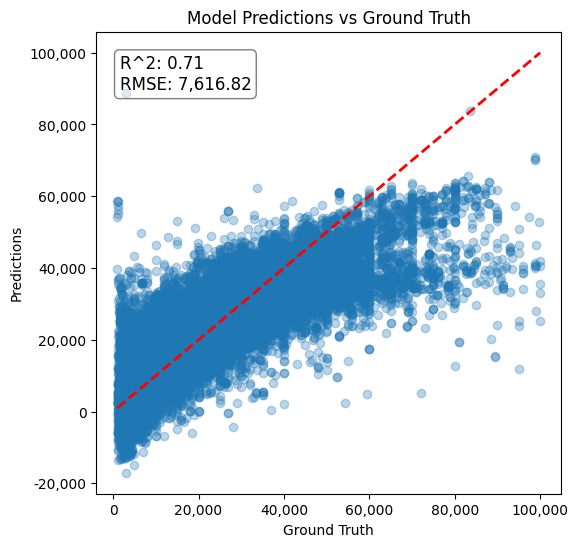

In [260]:
y_pred_benchmark = model.predict(X_test_transformed)
plot_predictions(y_test, y_pred_benchmark)

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

In [27]:
model = GradientBoostingRegressor(
    n_estimators=251,
    max_depth=15,
    learning_rate=0.2,
    max_features='sqrt',
    min_samples_leaf=8,
    random_state=333).fit(X_train_transformed, y_train)

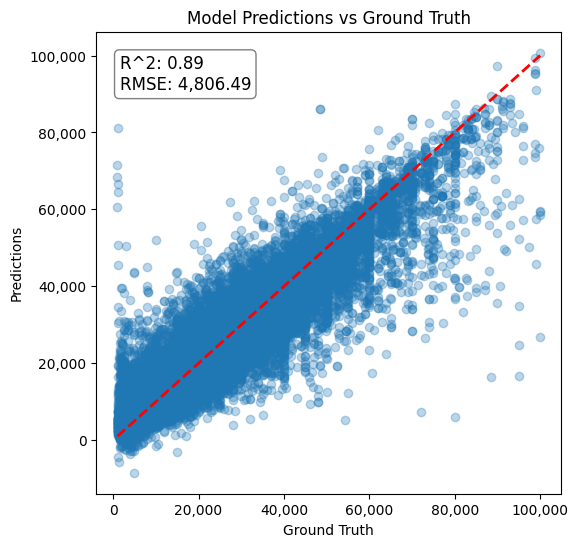

In [262]:
y_pred = model.predict(X_test_transformed)
plot_predictions(y_test, y_pred)

Save model in serialized format

In [28]:
pickle.dump(model, open('models/ml_model.pkl', 'wb'))

### Model Deployment (Bonus)

When we talk about deploying a model, we mean making a trained machine learning model available for use. This is like putting a finished product on a store shelf so that customers can buy it.

#### FastAPI for Model Deployment


FastAPI simplifies the deployment process by allowing developers to create something called APIs (Application Programming Interfaces).
An API is like a set of instructions that tells different software programs how to talk to each other. For example, if you have a model that predicts the weather, an API would allow other applications or users to send information (like the current temperature) to the model and get back a prediction (like whether it will rain tomorrow).
Within an API, there is a specific point called an inference point. This is where the model is actually hosted and ready to receive input data. When users send data to this point, they can get predictions back in real-time. This is crucial for integrating the model into other applications, making it easy for users to access its capabilities without needing to understand the underlying technology.


In [63]:
!fastapi dev day1_ml_fastapi.py

^C


Access the API documentation at [http://127.0.0.1:8000/docs](http://127.0.0.1:8000/docs)

#### Streamlit for App Deployment

Streamlit is an alternative to ease the deployment process of our ML model. It is an open-source app framework for Machine Learning and Data Science projects. It allows you to create interactive web applications with minimal effort. Streamlit can help you deploy your app by providing a user-friendly interface where users can input data, visualize results, and interact with the model in real-time. This makes it easier to demonstrate the capabilities of your model and gather feedback from users.

In [ ]:
!streamlit run day1_ml_streamlit.py